In [ ]:
import pandas as pd

df=pd.read_csv("/Users/devalpatel/Downloads/weatherAUS.csv")
df.head()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [212]:

ct = pd.crosstab(index=[df["WindDir9am"], df["WindDir3pm"]], columns=df["RainTomorrow"], normalize="index", margins=True)
ct.to_csv("1.csv")

In [164]:
# check the categorical variables isnull or not
categorical=[]
for var in df.columns:
    if df[var].dtype=="object":
        categorical.append(var)

print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [165]:
# Extract month from Date variable and Drop the Date variable
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month
df.drop(columns=["Date"], inplace=True)

In [166]:
pd.crosstab(index=df["Month"], columns=df["RainTomorrow"], normalize=True)

# We can drop Month Variable also as it doesn't carry much information (but we keep it for now)

RainTomorrow,No,Yes
Month,,
1,0.073302,0.017568
2,0.058498,0.015521
3,0.072120,0.019558
4,0.062190,0.017322
5,0.071129,0.020683
6,0.064314,0.022814
7,0.060537,0.022301
8,0.061831,0.020887
9,0.061459,0.018327


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [168]:
# one hot encoding of Location var
df = pd.get_dummies(data=df, columns=["Location"], dtype=int)


In [169]:
# do one hot encoding for all categorical variables (where null is there add seperate column to indicate)
df= pd.get_dummies(data=df, columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"], drop_first=True, dummy_na=True, dtype=int)

In [170]:
# Find all Numerical Variables in Dataset
numerical_cols=[]

temp_df = pd.read_csv("/Users/devalpatel/Downloads/weatherAUS.csv")
for col in temp_df.columns:
    if temp_df[col].dtype!="object":
        numerical_cols.append(col)

print(numerical_cols)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [171]:
# check missing value for numerical data
df[numerical_cols].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [172]:
print(round(df[numerical_cols].describe(),2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03     

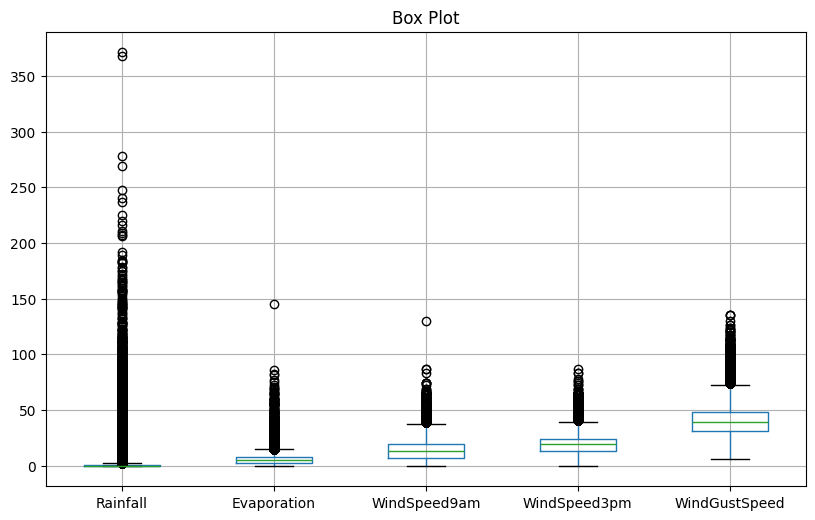

In [173]:
# rainfall, evaporation, windspeed9am, windspeed3am, windgustspeed has max value larger than respective mean or median
# ploting box plot to confirm that
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))


ax1= plt.subplot(2,2,1)
fig = df.boxplot(column=["Rainfall", "Evaporation", "WindSpeed9am", "WindSpeed3pm", "WindGustSpeed"], ax=ax1)
fig.set_title("Box Plot")

plt.tight_layout()
plt.show()


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1165/371123731.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(column=["Rainfall", "Evaporation", "WindSpeed9am", "WindSpeed3pm", "WindGustSpeed"], ax=ax1, bins=30)


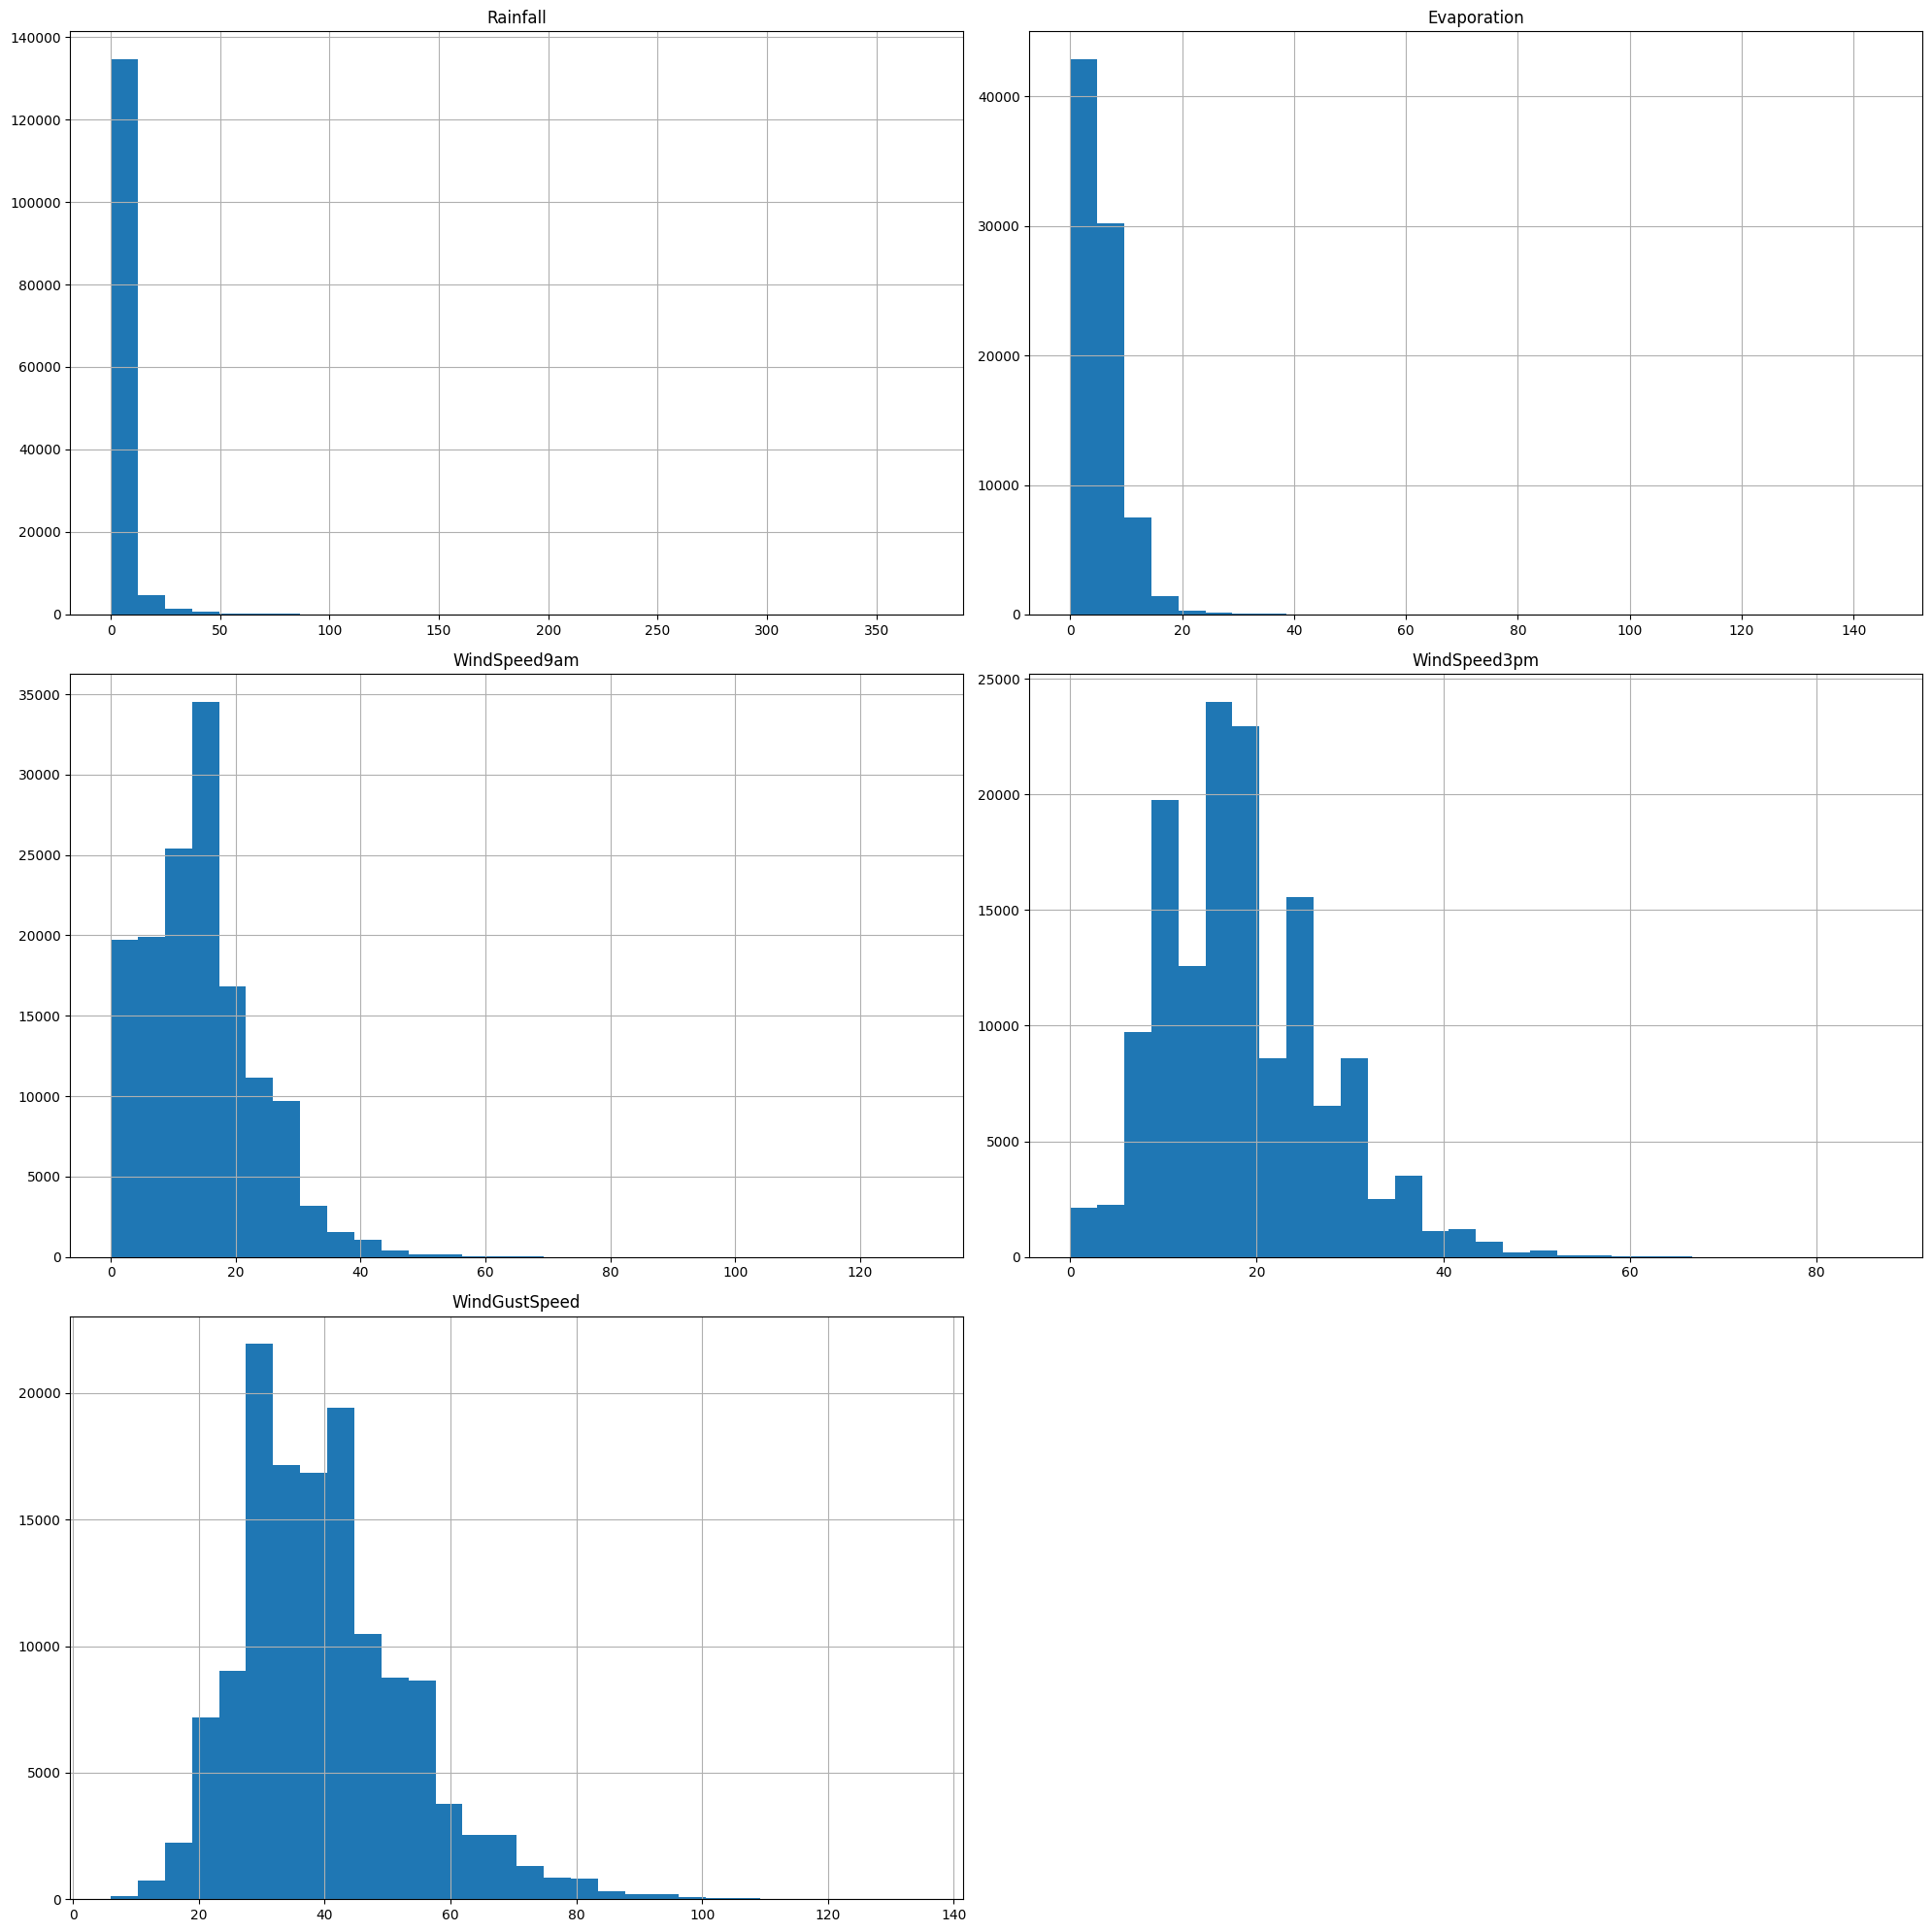

In [174]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(2,2,1)
df.hist(column=["Rainfall", "Evaporation", "WindSpeed9am", "WindSpeed3pm", "WindGustSpeed"], ax=ax1, bins=30)
plt.tight_layout()
plt.show()

In [175]:
# Find Interquantile Range for all above columns

lower_rainfall = df["Rainfall"].quantile(0.25)-(df["Rainfall"].quantile(0.75)-df["Rainfall"].quantile(0.25))*2
upper_rainfall = df["Rainfall"].quantile(0.75)+(df["Rainfall"].quantile(0.75)-df["Rainfall"].quantile(0.25))*2

lower_rainfall=max(lower_rainfall, df["Rainfall"].describe()[3])


lower_evaporation = df["Evaporation"].quantile(0.25)-(df["Evaporation"].quantile(0.75)-df["Evaporation"].quantile(0.25))*2
upper_evaporation = df["Evaporation"].quantile(0.75)+(df["Evaporation"].quantile(0.75)-df["Evaporation"].quantile(0.25))*2

lower_evaporation=max(lower_evaporation, df["Evaporation"].describe()[3])

lower_wind9 = df["WindSpeed9am"].quantile(0.25)-(df["WindSpeed9am"].quantile(0.75)-df["WindSpeed9am"].quantile(0.25))*2
upper_wind9 = df["WindSpeed9am"].quantile(0.75)+(df["WindSpeed9am"].quantile(0.75)-df["WindSpeed9am"].quantile(0.25))*2

lower_wind9=max(lower_wind9, df["WindSpeed9am"].describe()[3])


lower_wind3 = df["WindSpeed3pm"].quantile(0.25)-(df["WindSpeed3pm"].quantile(0.75)-df["WindSpeed3pm"].quantile(0.25))*2
upper_wind3 = df["WindSpeed3pm"].quantile(0.75)+(df["WindSpeed3pm"].quantile(0.75)-df["WindSpeed3pm"].quantile(0.25))*2

lower_wind3=max(lower_wind3, df["WindSpeed3pm"].describe()[3])

lower_windgust = df["WindGustSpeed"].quantile(0.25)-(df["WindGustSpeed"].quantile(0.75)-df["WindGustSpeed"].quantile(0.25))*2
upper_windgust = df["WindGustSpeed"].quantile(0.75)+(df["WindGustSpeed"].quantile(0.75)-df["WindGustSpeed"].quantile(0.25))*2

lower_windgust=max(lower_windgust, df["WindGustSpeed"].describe()[3])

print(lower_evaporation)
print(lower_wind3)
print(lower_windgust)




0.0
0.0
6.0


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1165/3347029544.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_rainfall=max(lower_rainfall, df["Rainfall"].describe()[3])
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1165/3347029544.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_evaporation=max(lower_evaporation, df["Evaporation"].describe()[3])
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1165/3347029544.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

In [176]:
X = df.drop(columns="RainTomorrow")
y= df["RainTomorrow"]



In [ ]:
for col in X.columns:
    if col in numerical_cols:
        X[col].fillna(X[col].median(), inplace=True)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1165/3980494353.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1165/3980494353.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [188]:
#Dropping Rows where Y_info is not Present

print(y.isin(["Yes", "No"]))

X=X[y.isin(["Yes", "No"])]
y=y[y.isin(["Yes", "No"])]

print(X.shape)
print(y.shape)

(145460, 116)
(145460,)
['No' 'Yes' nan]
0          True
1          True
2          True
3          True
4          True
          ...  
145455     True
145456     True
145457     True
145458     True
145459    False
Name: RainTomorrow, Length: 145460, dtype: bool
(142193, 116)
(142193,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

non_numerical_cols=[]
for col in X_train:
    if col not in numerical_cols:
        non_numerical_cols.append(col)


# Normalize Numerical Data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(X_train[numerical_cols])
sc.transform(X_test[numerical_cols])

X_train = pd.concat([X_train[numerical_cols], X_train[non_numerical_cols]], axis=1)
X_test= pd.concat([X_test[numerical_cols], X_test[non_numerical_cols]], axis=1)

(110910, 116)
(31283, 116)


In [194]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [196]:
y_pred_test = logreg.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [197]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

In [198]:
print(cm)

[[22971  1284]
 [ 3452  3576]]


In [199]:
print("Accuracy :", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][1]+cm[1][0]))

Accuracy : 0.8486078700891858
